In [54]:
import keras as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Dropout
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


---
## Image loading and Preprocessing
---

In [57]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [62]:
#scale down the image RGB from 255 to values between 0-1
x_train = x_train/255
x_test = x_test/255

#encode the labels using one-hot-encoding method 
#we have 10 labels from 0 to 9 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)



---
## CNN MODEL (LeNet)
---

In [69]:
#create the model 
#the LeNet CNN Model
model = Sequential()
#feature extractor layer
model.add(Conv2D(32, (5,5), activation='relu', strides=1, padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides=2))
model.add(Conv2D(32, (5,5),strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax')) #becouse we have 10 catigories 


In [70]:
# compile the model
model.compile(loss ='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
#train the model 

hist = model.fit(x_train, 
                 y_train_one_hot,
                 batch_size=256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 15s 92ms/step - loss: 1.6378 - accuracy: 0.4007 - val_loss: 1.4284 - val_accuracy: 0.4786
Epoch 2/10
157/157 [==============================] - 18s 116ms/step - loss: 1.2270 - accuracy: 0.5570 - val_loss: 1.2074 - val_accuracy: 0.5728
Epoch 3/10
157/157 [==============================] - 18s 117ms/step - loss: 1.0204 - accuracy: 0.6370 - val_loss: 1.0275 - val_accuracy: 0.6382
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 0.8824 - accuracy: 0.6913 - val_loss: 0.9527 - val_accuracy: 0.6708
Epoch 5/10
157/157 [==============================] - 20s 126ms/step - loss: 0.7367 - accuracy: 0.7410 - val_loss: 0.9582 - val_accuracy: 0.6739
Epoch 6/10
157/157 [==============================] - 18s 116ms/step - loss: 0.6139 - accuracy: 0.7836 - val_loss: 0.9585 - val_accuracy: 0.6770
Epoch 7/10
157/157 [==============================] - 18s 117ms/step - loss: 0.4784 - accuracy: 0.8316 - val_loss: 0.9954 - val_acc

In [72]:
#show the model Accuracy
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 2s 7ms/step - loss: 1.3816 - accuracy: 0.6719


0.6718999743461609

In [73]:
#enable this only if you retrained the model again and got better performance
#save the trained model in a folder called "model" 
#model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


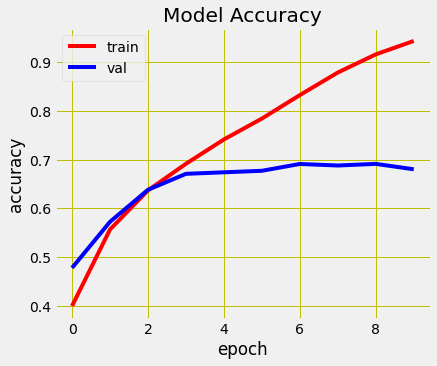

In [74]:

plt.figure(figsize=(6, 5))
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y')
plt.show()

In [80]:
#create the model 
#the LeNet CNN Model
model2 = Sequential()
#feature extractor layer
model2.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size = (2,2),strides=2))
model2.add(Conv2D(32, (5,5), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Flatten())
model2.add(Dense(1000,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(500,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(250,activation='relu'))
model2.add(Dense(10,activation='softmax')) #becouse we have 10 catigories 


In [81]:
# compile the model
model2.compile(loss ='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [87]:
#train the model 

hist2 = model2.fit(x_train, 
                 y_train_one_hot,
                 batch_size=256,
                 epochs = 8,
                 validation_split = 0.2)

Epoch 1/8
157/157 [==============================] - 17s 110ms/step - loss: 0.7092 - accuracy: 0.7496 - val_loss: 0.9020 - val_accuracy: 0.6872
Epoch 2/8
157/157 [==============================] - 33s 208ms/step - loss: 0.6657 - accuracy: 0.7637 - val_loss: 0.9020 - val_accuracy: 0.6953
Epoch 3/8
157/157 [==============================] - 34s 219ms/step - loss: 0.6327 - accuracy: 0.7771 - val_loss: 0.9029 - val_accuracy: 0.6982
Epoch 4/8
157/157 [==============================] - 32s 204ms/step - loss: 0.5895 - accuracy: 0.7896 - val_loss: 0.9629 - val_accuracy: 0.6875
Epoch 5/8
157/157 [==============================] - 33s 212ms/step - loss: 0.5448 - accuracy: 0.8065 - val_loss: 0.9490 - val_accuracy: 0.6950
Epoch 6/8
157/157 [==============================] - 34s 216ms/step - loss: 0.5045 - accuracy: 0.8191 - val_loss: 0.9395 - val_accuracy: 0.6979
Epoch 7/8
157/157 [==============================] - 32s 203ms/step - loss: 0.4834 - accuracy: 0.8285 - val_loss: 0.9452 - val_accuracy:

In [84]:
#show the model Accuracy
model2.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 3s 10ms/step - loss: 1.1617 - accuracy: 0.6181


0.6180999875068665

In [88]:
#enable this only if you retrained the model again and got better performance
#save the trained model in a folder called "model" 
model.save("model2")

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


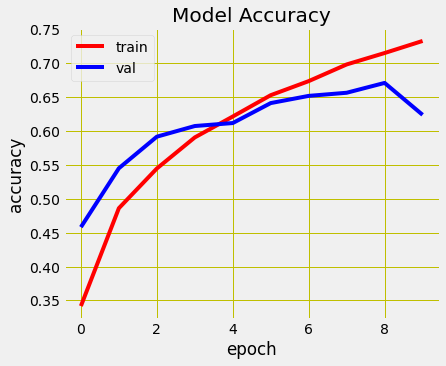

In [89]:

plt.figure(figsize=(6, 5))
plt.plot(hist2.history['accuracy'], color='r')
plt.plot(hist2.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y')
plt.show()